# Search in MAST catalogs with GALEX

- author : Sylvie Dagoret-Campagne
- creation date : 2023-05-29
- update : 2023-05-30


Purpose : match FORS2 and GALEX catalogs. 
We may have DR1 and DR2.
It may be interesting in getting later releases from a web portal. 

https://astroquery.readthedocs.io/en/latest/mast/mast.html

In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS

from astroquery.simbad import Simbad
from astroquery.mast import Observations

import astropy.coordinates as coordinates
from astropy.coordinates import SkyCoord
from astropy.coordinates import angular_separation
from astropy.coordinates import Angle
import astropy.units as u

In [2]:
import h5py
import pandas as pd
import numpy as np

In [3]:
from astropy.table.pprint import conf
#conf.max_lines = -1
#conf.max_width = -1

In [4]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [5]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info

## Read Fors2

In [6]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [7]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [8]:
df_info = ReadFors2h5FileAttributes(hf)

In [9]:
# mandatory to merge the two dataframe row by row
df_info.reset_index(drop=True, inplace=True) 

In [10]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


## Observations

In [11]:
print(Observations.list_missions())

['HST', 'EUVE', 'TUES', 'HLSP', 'JWST', 'SPITZER_SHA', 'HUT', 'HLA', 'OPO', 'WUPPE', 'IUE', 'FIMS-SPEAR', 'BEFS', 'KeplerFFI', 'TESS', 'K2FFI', 'K2', 'FUSE', 'SWIFT', 'GALEX', 'Kepler', 'PS1']


## Target

In [12]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [13]:
result_table = Simbad.query_object(target_name_simbad)

In [14]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [15]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

## MAST Observations

In [16]:
#obs_table = Observations.query_object(target_name_simbad,radius="0.25deg")

In [17]:
# obs_table 

In [18]:
# obs_table = Observations.query_criteria(filters=["*UV","Kepler"],objectname=target_name_simbad)

In [19]:
# obs_table

In [20]:
#print(Observations.query_object_count(target_name_simbad,radius=".25 deg"))  

In [21]:
# print(Observations.query_criteria_count(dataproduct_type="image",filters=["NUV","FUV"]))

In [22]:
# obs_table = Observations.query_object(target_name_simbad,radius=".25 deg")
# data_products_by_obs = Observations.get_product_list(obs_table[0:2])
# print(data_products_by_obs)  

In [23]:
#data_products_by_obs = Observations.get_product_list(obs_table)

In [24]:
#print(data_products_by_obs)  

## Missions

In [25]:
#from astroquery.mast import MastMissions
#missions = MastMissions()

In [26]:
# missions.mission

In [27]:
# columns = missions.get_column_list()

In [28]:
# columns

In [29]:
# results = missions.query_region(coord, radius=0.25)

In [30]:
#results

# Catalog




    The Hubble Source Catalog (HSC)

    The GALEX Catalog (V2 and V3)

    The Gaia (DR1 and DR2) and TGAS Catalogs

    The TESS Input Catalog (TIC)

    The TESS Candidate Target List (CTL)

    The Disk Detective Catalog

    The PanSTARRS Catalog (DR1 and DR2)

    The All-Sky PLATO Input Catalog (DR1)


In [31]:
from astroquery.mast import Catalogs

## Galex catalog matching

- No way to know which version we really have

In [32]:
catalog_data = Catalogs.query_object(target_name_simbad, catalog="Galex",data_release="DR6",radius=0.25)

In [33]:
catalog_data

distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,fuv_mag,fuv_magerr,nuv_mag,nuv_magerr,fuv_flux,fuv_fluxerr,nuv_flux,nuv_fluxerr,e_bv,ra_cent,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
float64,str19,str3,float64,float64,int64,float64,str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,int64,float64,float64,int64
1.007453327937128,6380802579077530534,AIS,13.49358223794343,-28.40468652758306,1,0.296882182,GALEX J005358.4-282416,108.0,108.0,--,--,21.5107937,0.3604291,--,--,9.029878,2.9968977,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.2677209,0.269305468,0,--,--,0
1.1570112318343508,6380802579077530499,AIS,13.52442935213248,-28.41510001695875,1,0.316882282,GALEX J005405.8-282454,108.0,108.0,--,--,22.173336,0.472773343,--,--,4.905293,2.13544345,0.0175703857,13.3758,-28.12652,1953.991,1915.793,--,0.1454338,0.113484353,0,--,--,0
1.2850870876665763,6380802579077530550,AIS,13.48753421553544,-28.40202009154056,1,0.292551041,GALEX J005357.0-282407,108.0,108.0,--,--,22.7267532,0.53684485,--,--,2.94644356,1.45652211,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.08735716,-0.0596656837,0,--,--,0
1.363584856331773,6380802579077530502,AIS,13.49267323055165,-28.41477545277933,1,0.30608356,GALEX J005358.2-282453,108.0,108.0,--,--,22.3088741,0.45572567,--,--,4.32962465,1.81687009,0.0180339962,13.3758,-28.12652,1953.991,1915.793,--,0.128366187,0.12960507,0,--,--,0
1.3815148586786572,6380802579077530542,AIS,13.53755642425988,-28.40298585619871,1,0.311017841,GALEX J005409.0-282410,108.0,108.0,--,--,22.4501553,0.5138618,--,--,3.801349,1.79868126,0.0187648423,13.3758,-28.12652,1953.991,1915.793,--,0.1127037,0.040572945,0,--,--,0
1.5200551875845891,6380802579077530547,AIS,13.54047227358614,-28.39828638191474,1,0.308050334,GALEX J005409.7-282353,108.0,108.0,--,--,21.3266182,0.315423965,--,--,10.6992226,3.10754251,0.0187648423,13.3758,-28.12652,1953.991,1915.793,--,0.317214221,0.2249951,0,--,--,0
1.6883066524555321,6380802579078582610,AIS,13.53805431735773,-28.3834546228873,2,0.294011921,GALEX J005409.1-282300,108.0,108.0,21.6375866,0.460561663,--,--,8.034657,3.407417,--,--,0.0191500764,13.3758,-28.12652,1953.991,1915.793,--,--,--,0,0.0746389255,0.03671759,0
1.723165844919715,6380802579077530443,AIS,13.51667761958675,-28.42778377828719,1,0.325811625,GALEX J005404.0-282540,108.0,108.0,--,--,22.1070976,0.438837051,--,--,5.21387529,2.10685229,0.0175703857,13.3758,-28.12652,1953.991,1915.793,--,0.154582754,0.0130709559,0,--,--,0
1.7356234878325882,6380802579077530498,AIS,13.48321810055538,-28.41386192357071,1,0.3025168,GALEX J005355.9-282449,108.0,108.0,--,--,22.4108486,0.480143726,--,--,3.94149017,1.74261677,0.0169403125,13.3758,-28.12652,1953.991,1915.793,--,0.116858654,0.1946647,0,--,--,0


In [34]:
len(catalog_data)

751

In [35]:
result_ptable = catalog_data.to_pandas()
result_ptable.head()

,distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,...,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
0,1.007453,6380802579077530534,AIS,13.493582,-28.404687,1,0.296882,GALEX J005358.4-282416,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.267721,0.269305,0,NaN,NaN,0
1,1.157011,6380802579077530499,AIS,13.524429,-28.415100,1,0.316882,GALEX J005405.8-282454,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.145434,0.113484,0,NaN,NaN,0
2,1.285087,6380802579077530550,AIS,13.487534,-28.402020,1,0.292551,GALEX J005357.0-282407,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.087357,-0.059666,0,NaN,NaN,0
3,1.363585,6380802579077530502,AIS,13.492673,-28.414775,1,0.306084,GALEX J005358.2-282453,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.128366,0.129605,0,NaN,NaN,0
4,1.381515,6380802579077530542,AIS,13.537556,-28.402986,1,0.311018,GALEX J005409.0-282410,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.112704,0.040573,0,NaN,NaN,0


In [36]:
all_ra = catalog_data['ra'].data
all_dec = catalog_data['dec'].data

In [37]:
catalog_galex = SkyCoord(all_ra*u.degree,all_dec*u.degree)

In [38]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


In [39]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

# loop on FORS2 row and calculate the smallest angular separation in the Galex catalog
for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_galex)
    all_idx.append(int(idx))
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    # print(idx,Angle(d2d[0]).arcsec,d3d)

Text(0.5, 1.0, 'Angular separation FORS2-Galex')

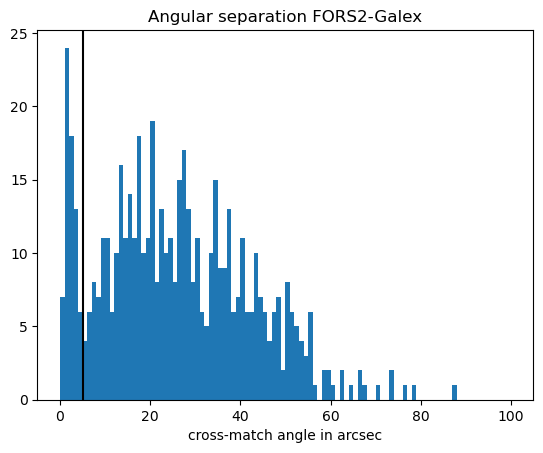

In [40]:
plt.hist(all_d2d,bins=100,range=(0,100));
plt.xlabel("cross-match angle in arcsec")
plt.axvline(5.0,color="k")
plt.title("Angular separation FORS2-Galex")

### Extract magnitudes from Galex

In [41]:
result_ptable.rename(columns={"ra": "ra_galex", "dec": "dec_galex"},inplace=True)

In [42]:
for colname in result_ptable.columns:
    print(colname)

distance_arcmin
objID
survey
ra_galex
dec_galex
band
fov_radius
IAUName
nuv_exptime
fuv_exptime
fuv_mag
fuv_magerr
nuv_mag
nuv_magerr
fuv_flux
fuv_fluxerr
nuv_flux
nuv_fluxerr
e_bv
ra_cent
dec_cent
xCenter
yCenter
SSAPFitsFile
nuv_flux_auto
nuv_flux_aper_7
nuv_artifact
fuv_flux_auto
fuv_flux_aper_7
fuv_artifact


### Create an extended info dataframe

In [43]:
SelectedColumns = ["objID", "survey","ra_galex","dec_galex","fuv_mag","nuv_mag","fuv_magerr","nuv_magerr","fuv_flux","nuv_flux","fuv_fluxerr","nuv_fluxerr" ]

In [44]:
result_ptable= result_ptable[SelectedColumns]

# Create an extended dataframe

In [45]:
df_info_extended = pd.DataFrame(columns=SelectedColumns)

In [46]:
N = len(df_info)
# loop on FORS2 catalog rows to fill df_info_extended
for index in range (N):
    index_kids_table = all_idx[index]
    all_angularsep = all_d2d[index] 
    df_info_extended.loc[index] = result_ptable.iloc[index_kids_table].values

In [47]:
df_info_extended

,objID,survey,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,6380802579079627441,AIS,13.531423,-28.456012,20.422865,21.14517,0.252426,0.255224,24.59552,12.645368,5.7169,2.971828
1,6380802579077530499,AIS,13.524429,-28.4151,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443
2,6380802579077530534,AIS,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898
3,6380802579077530647,AIS,13.488292,-28.374033,NaN,22.629692,NaN,0.543497,NaN,3.221977,NaN,1.612464
4,6380802579077530370,AIS,13.602319,-28.443209,NaN,21.152737,NaN,0.287115,NaN,12.55755,NaN,3.31995
...,...,...,...,...,...,...,...,...,...,...,...,...
545,6380802579079628326,AIS,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.7033,7.885356,19.391645
546,6380802579079628405,AIS,13.687228,-28.226752,20.512026,20.175917,0.277843,0.297318,22.656444,30.876852,5.796451,8.45325
547,6380802579079628326,AIS,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.7033,7.885356,19.391645
548,6380802579079628409,AIS,13.628613,-28.230257,21.295267,21.704386,0.383258,0.396922,11.012729,7.55519,3.886483,2.761346


In [48]:
df_info_extended["angularsep"] = all_d2d

## Concatenate the pandas dataframe

- be carefull to have the indexes increasing from to to N (otherwise the merging is done on pandas dataframe index number)

In [49]:
df_info_concatenated = pd.concat([df_info, df_info_extended], axis=1)

In [50]:
df_info_concatenated

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,...,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr,angularsep
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,...,-28.456012,20.422865,21.14517,0.252426,0.255224,24.59552,12.645368,5.7169,2.971828,30.060347
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,...,-28.4151,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443,20.808473
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,...,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898,27.954317
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,...,-28.374033,NaN,22.629692,NaN,0.543497,NaN,3.221977,NaN,1.612464,34.131891
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,...,-28.443209,NaN,21.152737,NaN,0.287115,NaN,12.55755,NaN,3.31995,35.437832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,...,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.7033,7.885356,19.391645,25.387088
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,...,-28.226752,20.512026,20.175917,0.277843,0.297318,22.656444,30.876852,5.796451,8.45325,42.903491
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,...,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.7033,7.885356,19.391645,29.898930
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,...,-28.230257,21.295267,21.704386,0.383258,0.396922,11.012729,7.55519,3.886483,2.761346,12.801767


## Save file 

In [51]:
outputfile = "info_fors2Galexcrossmatch.csv"

In [52]:
df_info_concatenated.to_csv(outputfile)

# All MAST missions

In [53]:
# print(Observations.list_missions())

In [54]:
#obs_list = Observations.list_missions()
#for obs in obs_list:
#    try: 
#        catalog_data = Catalogs.query_object(target_name_simbad, catalog=obs)
#        N = len(catalog_data)
#        print(f"catalog {obs}  N= {N}")
#    except OSError as err:
#        print("OS error:", err)
#    except ValueError:
#        print("Could not convert data to an integer.")
#    except Exception as err:
#        print(f"Unexpected {err=}, {type(err)=}")